# Business Underestnding
Market & Strategic Analysis: Evaluate which campaigns, ad types, or targeting strategies yielded the best results.

Cohort & Behavioral Analysis: Track how different user segments (cohorts) behave over time.


# Data Collection
We just used from kaggle source - so no need to collect explicitly.
Based on KPI/ analysis, organize names and types of data required.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import duckdb
from sklearn.preprocessing import MinMaxScaler
import scipy.stats as stats


In [ ]:
#connect to database file
con = duckdb.connect('/content/ad_campaign_db.sqlite')

In [ ]:
#check table
con.execute('SHOW TABLES').fetchall()

[('ad_events',), ('ads',), ('campaigns',), ('users',)]

# Data understanding

##### Ad_events

In [ ]:
ad_events_t = con.execute('SELECT * FROM ad_events').df()
ad_events_t.head()

,event_id,ad_id,user_id,timestamp,day_of_week,time_of_day,event_type
0,1,197,2359b,2025-07-26 00:19:56,Saturday,Night,Like
1,2,51,f9c67,2025-06-15 08:28:07,Sunday,Morning,Share
2,3,46,5b868,2025-06-27 00:40:02,Friday,Night,Impression
3,4,166,3d440,2025-06-05 19:20:45,Thursday,Evening,Impression
4,5,52,68f1a,2025-07-22 08:30:29,Tuesday,Morning,Impression


In [ ]:
ad_events_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   event_id     400000 non-null  int64 
 1   ad_id        400000 non-null  int64 
 2   user_id      400000 non-null  object
 3   timestamp    400000 non-null  object
 4   day_of_week  400000 non-null  object
 5   time_of_day  400000 non-null  object
 6   event_type   400000 non-null  object
dtypes: int64(2), object(5)
memory usage: 21.4+ MB


In [ ]:
ad_events_t.event_id.nunique()

400000

In [ ]:
ad_events_t.user_id.nunique()

9950

In [ ]:
ad_events_t.event_type.unique()

array(['Like', 'Share', 'Impression', 'Purchase', 'Click', 'Comment'],
      dtype=object)

In [ ]:
ad_events_t.time_of_day.unique()

array(['Night', 'Morning', 'Evening', 'Afternoon'], dtype=object)

In [ ]:
ad_events_t.day_of_week.unique()

array(['Saturday', 'Sunday', 'Friday', 'Thursday', 'Tuesday', 'Monday',
       'Wednesday'], dtype=object)

In [ ]:
ad_events_t['timestamp'] = pd.to_datetime(ad_events_t['timestamp'])

In [ ]:
ad_events_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   event_id     400000 non-null  int64         
 1   ad_id        400000 non-null  int64         
 2   user_id      400000 non-null  object        
 3   timestamp    400000 non-null  datetime64[ns]
 4   day_of_week  400000 non-null  object        
 5   time_of_day  400000 non-null  object        
 6   event_type   400000 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 21.4+ MB


##### Ads

In [ ]:
ads_t = con.execute('SELECT * FROM ads').df()
ads_t.head()

,ad_id,campaign_id,ad_platform,ad_type,target_gender,target_age_group,target_interests
0,1,28,Facebook,Video,Female,35-44,"art, technology"
1,2,33,Facebook,Stories,All,25-34,"travel, photography"
2,3,20,Instagram,Carousel,All,25-34,technology
3,4,28,Facebook,Stories,Female,25-34,news
4,5,24,Instagram,Image,Female,25-34,news


In [ ]:
ads_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ad_id             200 non-null    int64 
 1   campaign_id       200 non-null    int64 
 2   ad_platform       200 non-null    object
 3   ad_type           200 non-null    object
 4   target_gender     200 non-null    object
 5   target_age_group  200 non-null    object
 6   target_interests  200 non-null    object
dtypes: int64(2), object(5)
memory usage: 11.1+ KB


In [ ]:
ads_t.ad_platform.unique()

array(['Facebook', 'Instagram'], dtype=object)

In [ ]:
ads_t.target_interests.nunique()

90

##### Campaigns

In [ ]:
campaigns_t = con.execute('SELECT * FROM campaigns').df()
campaigns_t.head()

,campaign_id,name,start_date,end_date,duration_days,total_budget
0,1,Campaign_1_Launch,2025-05-25,2025-07-23,59,24021.32
1,2,Campaign_2_Launch,2025-04-16,2025-07-07,82,79342.41
2,3,Campaign_3_Winter,2025-05-04,2025-06-29,56,14343.25
3,4,Campaign_4_Summer,2025-06-04,2025-08-08,65,45326.60
4,5,Campaign_5_Launch,2025-07-11,2025-08-28,48,68376.69


In [ ]:
campaigns_t['campaigns_names'] = campaigns_t.set_index('campaign_id')['name'].to_dict()
campaigns_t.head()

,campaign_id,name,start_date,end_date,duration_days,total_budget,campaigns_names
0,1,Campaign_1_Launch,2025-05-25,2025-07-23,59,24021.32,NaN
1,2,Campaign_2_Launch,2025-04-16,2025-07-07,82,79342.41,Campaign_1_Launch
2,3,Campaign_3_Winter,2025-05-04,2025-06-29,56,14343.25,Campaign_2_Launch
3,4,Campaign_4_Summer,2025-06-04,2025-08-08,65,45326.60,Campaign_3_Winter
4,5,Campaign_5_Launch,2025-07-11,2025-08-28,48,68376.69,Campaign_4_Summer


In [ ]:
campaigns_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   campaign_id      50 non-null     int64  
 1   name             50 non-null     object 
 2   start_date       50 non-null     object 
 3   end_date         50 non-null     object 
 4   duration_days    50 non-null     int64  
 5   total_budget     50 non-null     float64
 6   campaigns_names  49 non-null     object 
dtypes: float64(1), int64(2), object(4)
memory usage: 2.9+ KB


In [ ]:
campaigns_t['start_date'] = pd.to_datetime(campaigns_t['start_date'])
campaigns_t['end_date'] = pd.to_datetime(campaigns_t['end_date'])

In [ ]:
campaigns_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   campaign_id      50 non-null     int64         
 1   name             50 non-null     object        
 2   start_date       50 non-null     datetime64[ns]
 3   end_date         50 non-null     datetime64[ns]
 4   duration_days    50 non-null     int64         
 5   total_budget     50 non-null     float64       
 6   campaigns_names  49 non-null     object        
dtypes: datetime64[ns](2), float64(1), int64(2), object(2)
memory usage: 2.9+ KB


##### Users

In [ ]:
users_t = con.execute('SELECT * FROM users').df()
users_t.head()

,user_id,user_gender,user_age,age_group,country,location,interests
0,a2474,Female,24,18-24,United Kingdom,New Mariomouth,"fitness, health"
1,141e5,Male,21,18-24,Germany,Danielsfort,"food, fitness, lifestyle"
2,34db0,Male,27,25-34,Australia,Vincentchester,"fashion, news"
3,20d08,Female,28,25-34,India,Lisaport,"health, news, finance"
4,9e830,Male,28,25-34,United States,Brownmouth,"health, photography, lifestyle"


In [ ]:
users_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      10000 non-null  object
 1   user_gender  10000 non-null  object
 2   user_age     10000 non-null  int64 
 3   age_group    10000 non-null  object
 4   country      10000 non-null  object
 5   location     10000 non-null  object
 6   interests    10000 non-null  object
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


# Planning
1. How many users engage with ads
2. How many users engage in which campaigns names
3. Which ads type have the highest users
4. Which ad_platform have the highest users
5. The relation between users and budgets
6. How many ad run in each campaigns
7. Ads in which days
8. Ads in which gender
9. Ads in which age group

#Analysis

In [ ]:
#How many users engage with ads
users_in_ads = ad_events_t.groupby('ad_id')['user_id'].nunique()
users_in_ads.describe()

,user_id
count,200.000000
mean,1810.610000
std,36.617237
min,1697.000000
25%,1785.750000
50%,1808.500000
75%,1835.250000
max,1921.000000


In [ ]:
users_in_ads.sort_values(ascending=False)

,user_id
ad_id,
70,1921
6,1897
66,1894
101,1893
192,1889
...,...
15,1746
129,1745
187,1744


In [ ]:
ad_events = ad_events_t.merge(ads_t, on='ad_id', how='left')
campaigns_ads = ad_events.merge(campaigns_t, on='campaign_id', how='left')
campaigns_ads.head()

,event_id,ad_id,user_id,timestamp,day_of_week,time_of_day,event_type,campaign_id,ad_platform,ad_type,target_gender,target_age_group,target_interests,name,start_date,end_date,duration_days,total_budget,campaigns_names
0,1,197,2359b,2025-07-26 00:19:56,Saturday,Night,Like,9,Facebook,Stories,All,All,"lifestyle, gaming",Campaign_9_Launch,2025-05-25,2025-07-13,49,40094.07,Campaign_8_Q3
1,2,51,f9c67,2025-06-15 08:28:07,Sunday,Morning,Share,26,Instagram,Carousel,All,18-24,photography,Campaign_26_Winter,2025-04-01,2025-06-17,77,44538.87,Campaign_25_Winter
2,3,46,5b868,2025-06-27 00:40:02,Friday,Night,Impression,10,Instagram,Carousel,All,35-44,"technology, travel",Campaign_10_Winter,2025-05-17,2025-07-21,65,19669.27,Campaign_9_Launch
3,4,166,3d440,2025-06-05 19:20:45,Thursday,Evening,Impression,14,Instagram,Image,All,All,fashion,Campaign_14_Summer,2025-04-15,2025-06-04,50,39849.94,Campaign_13_Winter
4,5,52,68f1a,2025-07-22 08:30:29,Tuesday,Morning,Impression,2,Instagram,Stories,Female,35-44,"health, lifestyle",Campaign_2_Launch,2025-04-16,2025-07-07,82,79342.41,Campaign_1_Launch


In [ ]:
users_per_campaign = campaigns_ads.groupby('name')['user_id'].nunique()
users_per_campaign.describe()

,user_id
count,48.000000
mean,5305.375000
std,1681.221815
min,1794.000000
25%,4457.000000
50%,5394.000000
75%,6953.500000
max,7978.000000


In [ ]:
users_per_campaign.sort_values(ascending=False)

,user_id
name,
Campaign_38_Q3,7978
Campaign_20_Winter,7966
Campaign_42_Summer,7953
Campaign_24_Summer,7935
Campaign_17_Launch,7880
Campaign_33_Summer,7580
Campaign_29_Winter,7485
Campaign_9_Launch,7016
Campaign_13_Winter,7002


In [ ]:
users_per_campaign.info()

<class 'pandas.core.series.Series'>
Index: 48 entries, Campaign_10_Winter to Campaign_9_Launch
Series name: user_id
Non-Null Count  Dtype
--------------  -----
48 non-null     int64
dtypes: int64(1)
memory usage: 768.0+ bytes


In [ ]:
# Which ads type have the highest users
highest_ad_type_users = campaigns_ads.groupby('ad_type')['user_id'].nunique()
highest_ad_type_users

,user_id
ad_type,
Carousel,9950
Image,9949
Stories,9950
Video,9936


In [ ]:
highest_ad_type_users.sort_values(ascending=False)

,user_id
ad_type,
Carousel,9950
Stories,9950
Image,9949
Video,9936


In [ ]:
# Which ad_platform have the highest users
users_in_adplt = ad_events_t.merge(ads_t, on='ad_id', how='left')
users_in_adplt
highest_users_adplt = users_in_adplt.groupby('ad_platform')['user_id'].nunique()
highest_users_adplt

,user_id
ad_platform,
Facebook,9950
Instagram,9950


In [ ]:
users_in_adplt.head()

,event_id,ad_id,user_id,timestamp,day_of_week,time_of_day,event_type,campaign_id,ad_platform,ad_type,target_gender,target_age_group,target_interests
0,1,197,2359b,2025-07-26 00:19:56,Saturday,Night,Like,9,Facebook,Stories,All,All,"lifestyle, gaming"
1,2,51,f9c67,2025-06-15 08:28:07,Sunday,Morning,Share,26,Instagram,Carousel,All,18-24,photography
2,3,46,5b868,2025-06-27 00:40:02,Friday,Night,Impression,10,Instagram,Carousel,All,35-44,"technology, travel"
3,4,166,3d440,2025-06-05 19:20:45,Thursday,Evening,Impression,14,Instagram,Image,All,All,fashion
4,5,52,68f1a,2025-07-22 08:30:29,Tuesday,Morning,Impression,2,Instagram,Stories,Female,35-44,"health, lifestyle"


In [ ]:
#The relation between users and budgets
rs_t = ad_events_t.merge(ads_t, on='ad_id', how='left')
rs_t = rs_t.merge(campaigns_t, on='campaign_id', how='left')
rs_t



,event_id,ad_id,user_id,timestamp,day_of_week,time_of_day,event_type,campaign_id,ad_platform,ad_type,target_gender,target_age_group,target_interests,name,start_date,end_date,duration_days,total_budget,campaigns_names
0,1,197,2359b,2025-07-26 00:19:56,Saturday,Night,Like,9,Facebook,Stories,All,All,"lifestyle, gaming",Campaign_9_Launch,2025-05-25,2025-07-13,49,40094.07,Campaign_8_Q3
1,2,51,f9c67,2025-06-15 08:28:07,Sunday,Morning,Share,26,Instagram,Carousel,All,18-24,photography,Campaign_26_Winter,2025-04-01,2025-06-17,77,44538.87,Campaign_25_Winter
2,3,46,5b868,2025-06-27 00:40:02,Friday,Night,Impression,10,Instagram,Carousel,All,35-44,"technology, travel",Campaign_10_Winter,2025-05-17,2025-07-21,65,19669.27,Campaign_9_Launch
3,4,166,3d440,2025-06-05 19:20:45,Thursday,Evening,Impression,14,Instagram,Image,All,All,fashion,Campaign_14_Summer,2025-04-15,2025-06-04,50,39849.94,Campaign_13_Winter
4,5,52,68f1a,2025-07-22 08:30:29,Tuesday,Morning,Impression,2,Instagram,Stories,Female,35-44,"health, lifestyle",Campaign_2_Launch,2025-04-16,2025-07-07,82,79342.41,Campaign_1_Launch
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,399996,132,3cb8c,2025-08-01 22:36:54,Friday,Evening,Impression,1,Facebook,Carousel,Female,18-24,news,Campaign_1_Launch,2025-05-25,2025-07-23,59,24021.32,NaN
399996,399997,200,fe0e3,2025-05-31 14:53:18,Saturday,Afternoon,Impression,44,Instagram,Carousel,Male,18-24,photography,Campaign_44_Q3,2025-07-14,2025-09-22,70,15914.87,Campaign_43_Winter
399997,399998,2,a08c1,2025-07-27 13:39:51,Sunday,Afternoon,Click,33,Facebook,Stories,All,25-34,"travel, photography",Campaign_33_Summer,2025-04-08,2025-07-04,87,59264.68,Campaign_32_Summer
399998,399999,109,4f0cf,2025-05-16 02:38:23,Friday,Night,Impression,8,Facebook,Stories,All,35-44,"travel, fashion",Campaign_8_Q3,2025-02-25,2025-04-07,41,39953.19,Campaign_7_Winter


In [ ]:
users_per_budget = rs_t.groupby('total_budget')['user_id'].nunique().reset_index()

# Scale the total_budget data
scaler = MinMaxScaler()
users_per_budget['scaled_total_budget'] = scaler.fit_transform(users_per_budget[['total_budget']])

users_per_budget

,total_budget,user_id,scaled_total_budget
0,7918.04,7953,0.000000
1,12986.30,3242,0.055703
2,13842.07,3292,0.065109
3,14343.25,5479,0.070617
4,15914.87,5460,0.087890
5,19669.27,5362,0.129153
6,19773.66,7485,0.130301
7,21855.42,7002,0.153181
8,24021.32,4406,0.176985
9,26001.67,4445,0.198750


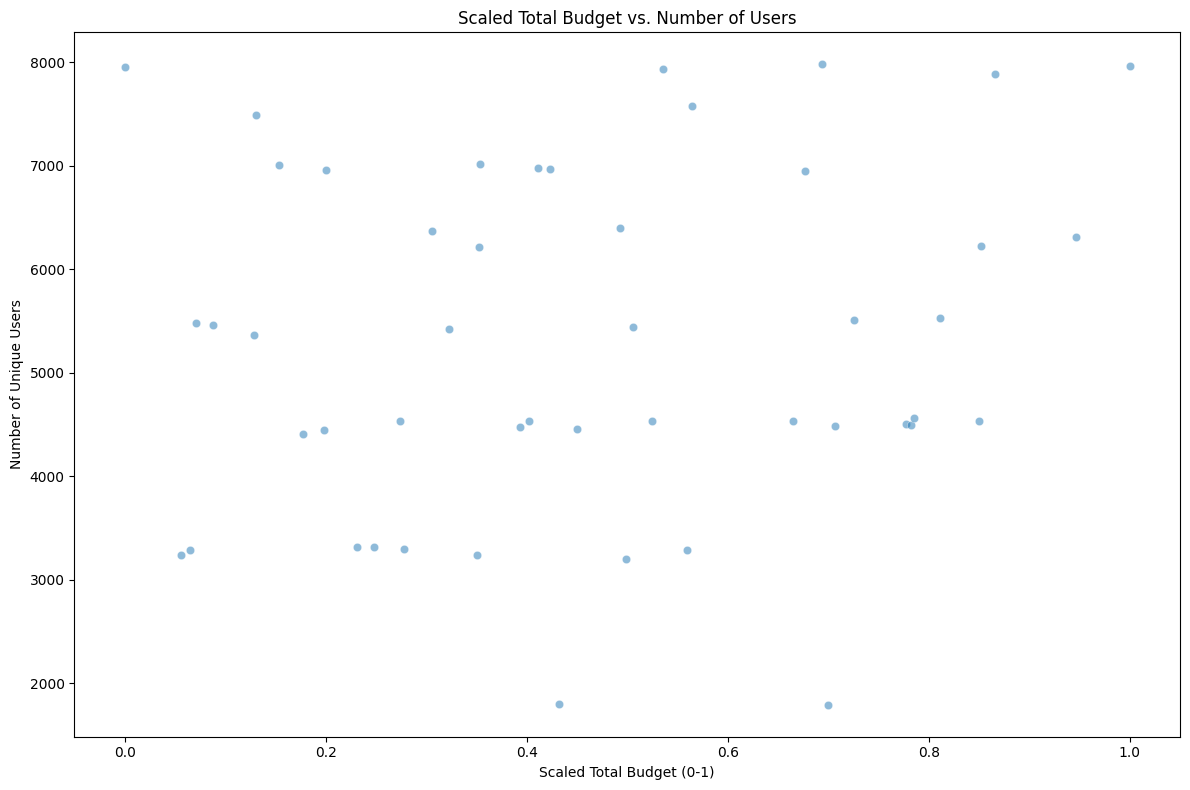

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=users_per_budget, x='scaled_total_budget', y='user_id', alpha=0.5)

plt.title('Scaled Total Budget vs. Number of Users')
plt.xlabel('Scaled Total Budget (0-1)')
plt.ylabel('Number of Unique Users')
plt.tight_layout()
plt.show()

In [ ]:
#How many ad run in each campaigns
n_of_ad = rs_t.groupby('campaign_id').nunique()[['ad_id','user_id']]
n_of_ad


,ad_id,user_id
campaign_id,,
1,3,4406
2,3,4563
3,4,5479
4,6,6981
5,3,4532
6,3,4503
7,3,4478
8,5,6214
9,6,7016


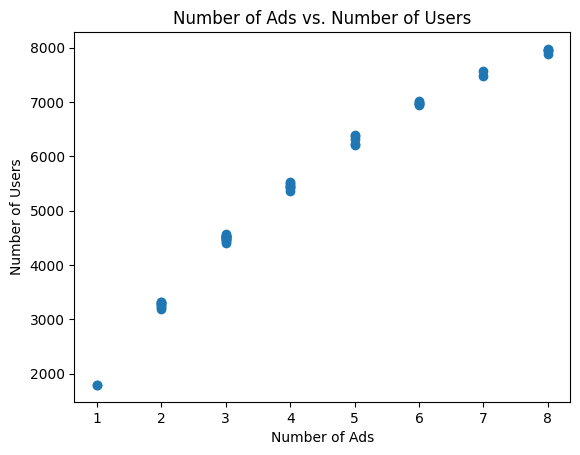

In [ ]:
plt.scatter(n_of_ad['ad_id'], n_of_ad['user_id'])
plt.xlabel('Number of Ads')
plt.ylabel('Number of Users')
plt.title('Number of Ads vs. Number of Users')
plt.show()

In [ ]:
# Targeted days
targeted_days = rs_t.groupby('day_of_week')['user_id'].nunique()

In [ ]:
targeted_d = pd.pivot_table(rs_t,values = 'user_id', index = 'ad_id',columns = 'day_of_week',aggfunc = 'nunique')
targeted_d

day_of_week,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
ad_id,,,,,,,
1,289,284,280,286,280,299,304
2,272,276,294,296,301,307,283
3,284,274,300,280,301,260,273
4,279,283,287,317,280,286,284
5,271,276,304,307,263,297,261
...,...,...,...,...,...,...,...
196,279,271,310,260,284,295,280
197,276,281,315,294,293,277,254
198,306,242,285,272,302,253,275


In [ ]:
#ANOVA
#Null Hypothesis = All means are the same
#Alt Hypothesis = All means are not same
stats.f_oneway(targeted_d['Monday'],targeted_d['Tuesday'],targeted_d['Wednesday'],targeted_d['Thursday'],targeted_d['Friday'],targeted_d['Saturday'],targeted_d['Sunday'])

F_onewayResult(statistic=np.float64(0.4051608163307957), pvalue=np.float64(0.8759626798700861))

In [ ]:
targeted_d.describe()

day_of_week,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.0000
mean,283.105000,282.140000,281.150000,280.935000,281.705000,281.430000,281.3400
std,15.609042,16.212174,15.374308,15.919735,16.621956,18.133927,16.5549
min,247.000000,242.000000,234.000000,238.000000,239.000000,232.000000,244.0000
25%,273.000000,272.000000,272.000000,270.750000,271.750000,268.750000,269.0000
50%,283.000000,280.000000,281.500000,281.000000,281.500000,280.000000,282.5000
75%,293.250000,293.000000,292.000000,290.250000,292.000000,293.000000,292.0000
max,331.000000,330.000000,326.000000,333.000000,325.000000,331.000000,340.0000


In [ ]:
targeted_days.sort_values(ascending=False)

,user_id
day_of_week,
Friday,9922
Wednesday,9918
Monday,9917
Tuesday,9915
Sunday,9915
Thursday,9914
Saturday,9912


In [ ]:
#Targeted gender
targeted_gender = rs_t.groupby('target_gender')['user_id'].nunique()

In [ ]:
targeted_gender

,user_id
target_gender,
All,9950
Female,9950
Male,9948


In [ ]:
#Targeted Aged Gp
targeted_age_gp = rs_t.groupby('target_age_group')['user_id'].nunique()
targeted_age_gp

,user_id
target_age_group,
18-24,9950
25-34,9950
35-44,9949
All,9948


In [ ]:
# Customers Acquisition Cost
customers = rs_t.groupby('event_type')['user_id'].nunique()
customers

,user_id
event_type,
Click,9772
Comment,3339
Impression,9950
Like,6959
Purchase,1835
Share,1789


In [ ]:
purchased_cust = customers[customers.index == 'Purchase']

In [ ]:
cost = campaigns_t['total_budget'].sum()

In [ ]:
cac = cost/ purchased_cust.values[0]
cac

np.float64(1381.974811989101)

In [ ]:
rs_t

,event_id,ad_id,user_id,timestamp,day_of_week,time_of_day,event_type,campaign_id,ad_platform,ad_type,target_gender,target_age_group,target_interests,name,start_date,end_date,duration_days,total_budget,campaigns_names
0,1,197,2359b,2025-07-26 00:19:56,Saturday,Night,Like,9,Facebook,Stories,All,All,"lifestyle, gaming",Campaign_9_Launch,2025-05-25,2025-07-13,49,40094.07,Campaign_8_Q3
1,2,51,f9c67,2025-06-15 08:28:07,Sunday,Morning,Share,26,Instagram,Carousel,All,18-24,photography,Campaign_26_Winter,2025-04-01,2025-06-17,77,44538.87,Campaign_25_Winter
2,3,46,5b868,2025-06-27 00:40:02,Friday,Night,Impression,10,Instagram,Carousel,All,35-44,"technology, travel",Campaign_10_Winter,2025-05-17,2025-07-21,65,19669.27,Campaign_9_Launch
3,4,166,3d440,2025-06-05 19:20:45,Thursday,Evening,Impression,14,Instagram,Image,All,All,fashion,Campaign_14_Summer,2025-04-15,2025-06-04,50,39849.94,Campaign_13_Winter
4,5,52,68f1a,2025-07-22 08:30:29,Tuesday,Morning,Impression,2,Instagram,Stories,Female,35-44,"health, lifestyle",Campaign_2_Launch,2025-04-16,2025-07-07,82,79342.41,Campaign_1_Launch
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,399996,132,3cb8c,2025-08-01 22:36:54,Friday,Evening,Impression,1,Facebook,Carousel,Female,18-24,news,Campaign_1_Launch,2025-05-25,2025-07-23,59,24021.32,NaN
399996,399997,200,fe0e3,2025-05-31 14:53:18,Saturday,Afternoon,Impression,44,Instagram,Carousel,Male,18-24,photography,Campaign_44_Q3,2025-07-14,2025-09-22,70,15914.87,Campaign_43_Winter
399997,399998,2,a08c1,2025-07-27 13:39:51,Sunday,Afternoon,Click,33,Facebook,Stories,All,25-34,"travel, photography",Campaign_33_Summer,2025-04-08,2025-07-04,87,59264.68,Campaign_32_Summer
399998,399999,109,4f0cf,2025-05-16 02:38:23,Friday,Night,Impression,8,Facebook,Stories,All,35-44,"travel, fashion",Campaign_8_Q3,2025-02-25,2025-04-07,41,39953.19,Campaign_7_Winter


######Customer Aqusition cost by campaigns

In [ ]:
total_cust_by_camp = rs_t[rs_t['event_type'] == 'Purchase'].groupby('campaign_id',as_index= False)['user_id'].nunique()

In [ ]:
total_cust_by_camp

,campaign_id,user_id
0,1,33
1,2,31
2,3,41
3,4,49
4,5,34
5,6,33
6,7,33
7,8,47
8,9,61
9,10,51


In [ ]:
budgets_by_campaign = campaigns_t[['campaign_id','total_budget']]

In [ ]:
budgets_by_campaign

,campaign_id,total_budget
0,1,24021.32
1,2,79342.41
2,3,14343.25
3,4,45326.60
4,5,68376.69
5,6,78607.49
6,7,43744.59
7,8,39953.19
8,9,40094.07
9,10,19669.27


In [ ]:
cac_by_campaigns = total_cust_by_camp.merge(budgets_by_campaign, on='campaign_id', how='left')

In [ ]:
cac_by_campaigns.head()

,campaign_id,user_id,total_budget
0,1,33,24021.32
1,2,31,79342.41
2,3,41,14343.25
3,4,49,45326.60
4,5,34,68376.69


In [ ]:
cac_by_campaigns['cac'] = cac_by_campaigns['total_budget']/cac_by_campaigns['user_id']

In [ ]:
cac_by_campaigns.describe()

,campaign_id,user_id,total_budget,cac
count,48.000000,48.000000,48.000000,48.000000
mean,25.333333,42.229167,49646.908333,1608.446728
std,14.597192,21.348416,24481.363859,1407.457036
min,1.000000,8.000000,7918.040000,119.970303
25%,12.750000,29.250000,30134.822500,700.616229
50%,25.500000,38.500000,46859.950000,1153.411225
75%,37.250000,53.250000,71185.417500,2137.710405
max,50.000000,96.000000,98904.660000,6511.530000


In [ ]:
merged_t = ad_events_t.merge(ads_t, on='ad_id', how='left')
merged_t
highest_engagement = merged_t.groupby('target_interests')['user_id'].nunique()

In [ ]:
highest_engagement.sort_values(ascending=False)

,user_id
target_interests,
news,9069
photography,9042
fashion,9024
art,8607
health,7973
...,...
"photography, technology",1765
"food, gaming",1762
"fashion, photography",1759
